In [1]:
#Student Name: Raghuram Devarayi
#Student Email ID:21f1005431@ds.study.iitm.ac.in
#CrimeCast: Forecasting Crime Categories.
#This dataset offers a comprehensive snapshot of criminal activities within the city. It encompasses various aspects of each incident, including date,
#time, location, victim demographics etc etc
#By leveraging machine learning techniques, participants can analyze this rich dataset to predict crime categories, enhance law enforcement strategies
#and bolster public safety measures.
#The task is to Develop models capable of accurately predicting the crime categories based on this information.

'''
Sequence of variables for submission for each of the Model Performance in terms of Accuracy Prediction on Test Data
Predictions_On_Test_Data1 for DecisionTreeClassifier(Predicted Accuracy Score=0.85140)
Predictions_On_Test_Data2 for LogisticRegression Classifier(Predicted Accuracy Score=0.86640)
Predictions_On_Test_Data21 for LogisticRegressionCV Classifier(Predicted Accuracy Score=0.86720)
Predictions_On_Test_Data31 KNN(KNeighborsClassifier) Classifier with Hyperparameter Tuning using GridSearchCV((Predicted Accuracy Score=0.8392))
Predictions_On_Test_Data32 Support Vector Machines(svm.SVC) Classifier with Hyperparameter Tuning using GridSearchCV()
Predictions_On_Test_Data41 DecisionTreeClassifier with Hyperparameter Tuning using GridSearchCV()
Predictions_On_Test_Data42 Bagging algorithm Classifier with Hyperparameter Tuning using GridSearchCV()
Predictions_On_Test_Data43 Boosting algorithm Classifier with Hyperparameter Tuning using GridSearchCV()
Predictions_On_Test_Data44 Multi-Layer Perceptron algorithm Classifier with Hyperparameter Tuning using GridSearchCV()
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Classification Algorithms Trained So Far in the Kaggle Notebook:21f1005431-notebook-t22024.ipynb
# 1.    DecisionTree Classifier(Predicted Accuracy Score=0.85140)
# 2.    Logistic Regression Classifier without CV(Predicted Accuracy Score=0.86640)
# 2-1.  Logistic Regression Classifier with CV(Predicted Accuracy Score=0.86720)
# 3-1.  KNN(KNeighborsClassifier) Classifier with Hyperparameter Tuning using GridSearchCV(Predicted Accuracy Score=0.8392there is a built in cross validation argument in the algorithm)
# 3-2.  Support Vector Machines(svm.SVC) Classifier with Hyperparameter Tuning using GridSearchCV(Predicted Accuracy Score=)
# 4-1.  DecisionTree Classifier with Hyperparameter Tuning using GridSearchCV(Predicted Accuracy Score= )
# 4-2.  Bagging algorithm Classifier with Hyperparameter Tuning using GridSearchCV()
# 4-3.  Boosting algorithm Classifier with Hyperparameter Tuning using GridSearchCV()
# 4-4.  Multi-Layer Perceptron algorithm Classifier with Hyperparameter Tuning using GridSearchCV()


In [2]:
# Were you able to load the data? YES
# Load the Train dataset
#To Train and Test the Models in Kaggle Platform
Train_data_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

In [4]:
# Milestone1
# What is the shape of train.csv data?
# EDA(Exploratory Data Analysis)
Train_data_df.shape

(20000, 22)

In [172]:
# Milestone1
# Display the first 5 rows of the Data Frame of the Training Data
# EDA(Exploratory Data Analysis)
Train_data_df.head(n=5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
# Milestone1
# Were you able to load the Test data? YES
# Load the Test dataset
#To Train and Test the Models in Kaggle Platform
Test_data_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [174]:
# Milestone1
# What is the shape of test.csv data?
# EDA(Exploratory Data Analysis)
Test_data_df.shape

(5000, 21)

In [175]:
# Milestone1
# Display the first 5 rows of the Data Frame of the Test Data
# EDA(Exploratory Data Analysis)
Test_data_df.head(n=5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [6]:
# Milestone1
# Were you able to load the data? YES
# Load the Sample dataset
Sample_data_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')

In [88]:
# Milestone1
# What is the shape of sample.csv data?
# EDA(Exploratory Data Analysis)
Sample_data_df.shape

(1000, 3)

In [89]:
# Milestone1
# Display the first 5 rows of the Data Frame of the Sample Data
# EDA(Exploratory Data Analysis)
Sample_data_df.head(n=5)

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN


In [7]:
# Milestone1:
# Were there any numerical columns in the Train dataset? **** YES ****. A Total of NINE Features that are numerical type
# EDA(Exploratory Data Analysis)
Train_data_df.select_dtypes(include='number')


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,NaN
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,NaN
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,NaN
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.0
...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,NaN
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,NaN
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,NaN


In [91]:
Train_data_num_df=Train_data_df.select_dtypes(include='number')
Train_data_num_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [92]:
# Milestone1
# # Were there any categorical columns{Includes the target variable} in the Train dataset? **** YES ****.
# EDA(Exploratory Data Analysis)
Train_data_df.select_dtypes(include='object')

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,N Hollywood,0385,M,W,STREET,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,Newton,0906 0352 0371 0446 1822 0344 0416 0417,M,H,SWAP MEET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,Newton,0329 1202,M,B,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,Mission,0329 1300,M,H,STREET,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,77th Street,0416 0945 1822 0400 0417 0344,X,X,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,Southwest,0416 0446 2004 0913,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,West Valley,1822 0209 0344 1414 1420,M,W,GAS STATION,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,West LA,0344 1822 1420,M,H,SIDEWALK,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,Harbor,1202 2038 0913 0602 1242 0553,F,H,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Crimes against Public Order


In [93]:
# Milestone1
# Check the counts of each of different values of categorical featuress
# EDA(Exploratory Data Analysis)
print("value_counts() for", Train_data_df['Location'].value_counts())
print("value_counts() for", Train_data_df['Cross_Street'].value_counts())
print("value_counts() for", Train_data_df['Date_Reported'].value_counts())
print("value_counts() for", Train_data_df['Date_Occurred'].value_counts())
print("value_counts() for", Train_data_df['Area_Name'].value_counts())
print("value_counts() for", Train_data_df['Modus_Operandi'].value_counts())
print("value_counts() for", Train_data_df['Victim_Sex'].value_counts())
print("value_counts() for", Train_data_df['Victim_Descent'].value_counts())
print("value_counts() for", Train_data_df['Premise_Description'].value_counts())
print("value_counts() for", Train_data_df['Weapon_Description'].value_counts())
print("value_counts() for", Train_data_df['Status'].value_counts())
print("value_counts() for", Train_data_df['Status_Description'].value_counts())
print("value_counts() for", Train_data_df['Crime_Category'].value_counts())

value_counts() for Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64
value_counts() for Cross_Street
BROADWAY                           56
FIGUEROA                           43
VERMONT                      AV    40
FIGUEROA                     ST    34
MAIN                               33
                                   ..
VENTURA CANYON               BL     1
E  ORLANDO                          1
D                            ST     1
CABRILLO                     AV     1
HAVELOCK     

In [183]:
# Milestone1
# Display the first 5 rows of the Data Frame of the Test Data
# EDA(Exploratory Data Analysis)
Test_data_df.head(n=5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [9]:
# Milestone1:
# Were there any numerical columns in the Test dataset? **** YES ****. A Total of NINE Features that are numerical type
# EDA(Exploratory Data Analysis)
Test_data_df.select_dtypes(include='number')

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,501.0,400.0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,502.0,NaN
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,721.0,NaN
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,108.0,NaN
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,501.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,101.0,NaN
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,116.0,NaN
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,101.0,400.0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,502.0,500.0


In [10]:
# Milestone1
# # Were there any categorical columns{Excludes the target variable} in the Test dataset? **** YES ****, A Total of 12 categorical or object types
# EDA(Exploratory Data Analysis)
Test_data_df.select_dtypes(include='object')

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,Southwest,0416 1241 1243 1813 1821 2000,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,Olympic,0344 0394,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,Southeast,1822 0701 1914 0355 1202 0100,F,B,HIGH SCHOOL,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,Wilshire,NaN,NaN,NaN,PARKING LOT,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,N Hollywood,1501,F,W,SINGLE FAMILY DWELLING,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,Wilshire,NaN,NaN,NaN,STREET,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,Hollenbeck,1300 0325,X,X,OTHER/OUTSIDE,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,Mission,0913 1817 0416,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,Central,0416,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [142]:
Test_data_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


In [94]:
# Milestone1:
# Were there any numerical columns in the Sample dataset? **** YES ****. A Total of TWO Features that are numerical type
# EDA(Exploratory Data Analysis)
Sample_data_df.select_dtypes(include='number')

,ID,Unnamed: 2
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
995,996,NaN
996,997,NaN
997,998,NaN
998,999,NaN


In [17]:
# Define X and y from Train Data
X = Train_data_df.drop(columns=['Crime_Category'], axis=1)
X_numerical = Train_data_df.select_dtypes(include='number')
y = Train_data_df['Crime_Category']

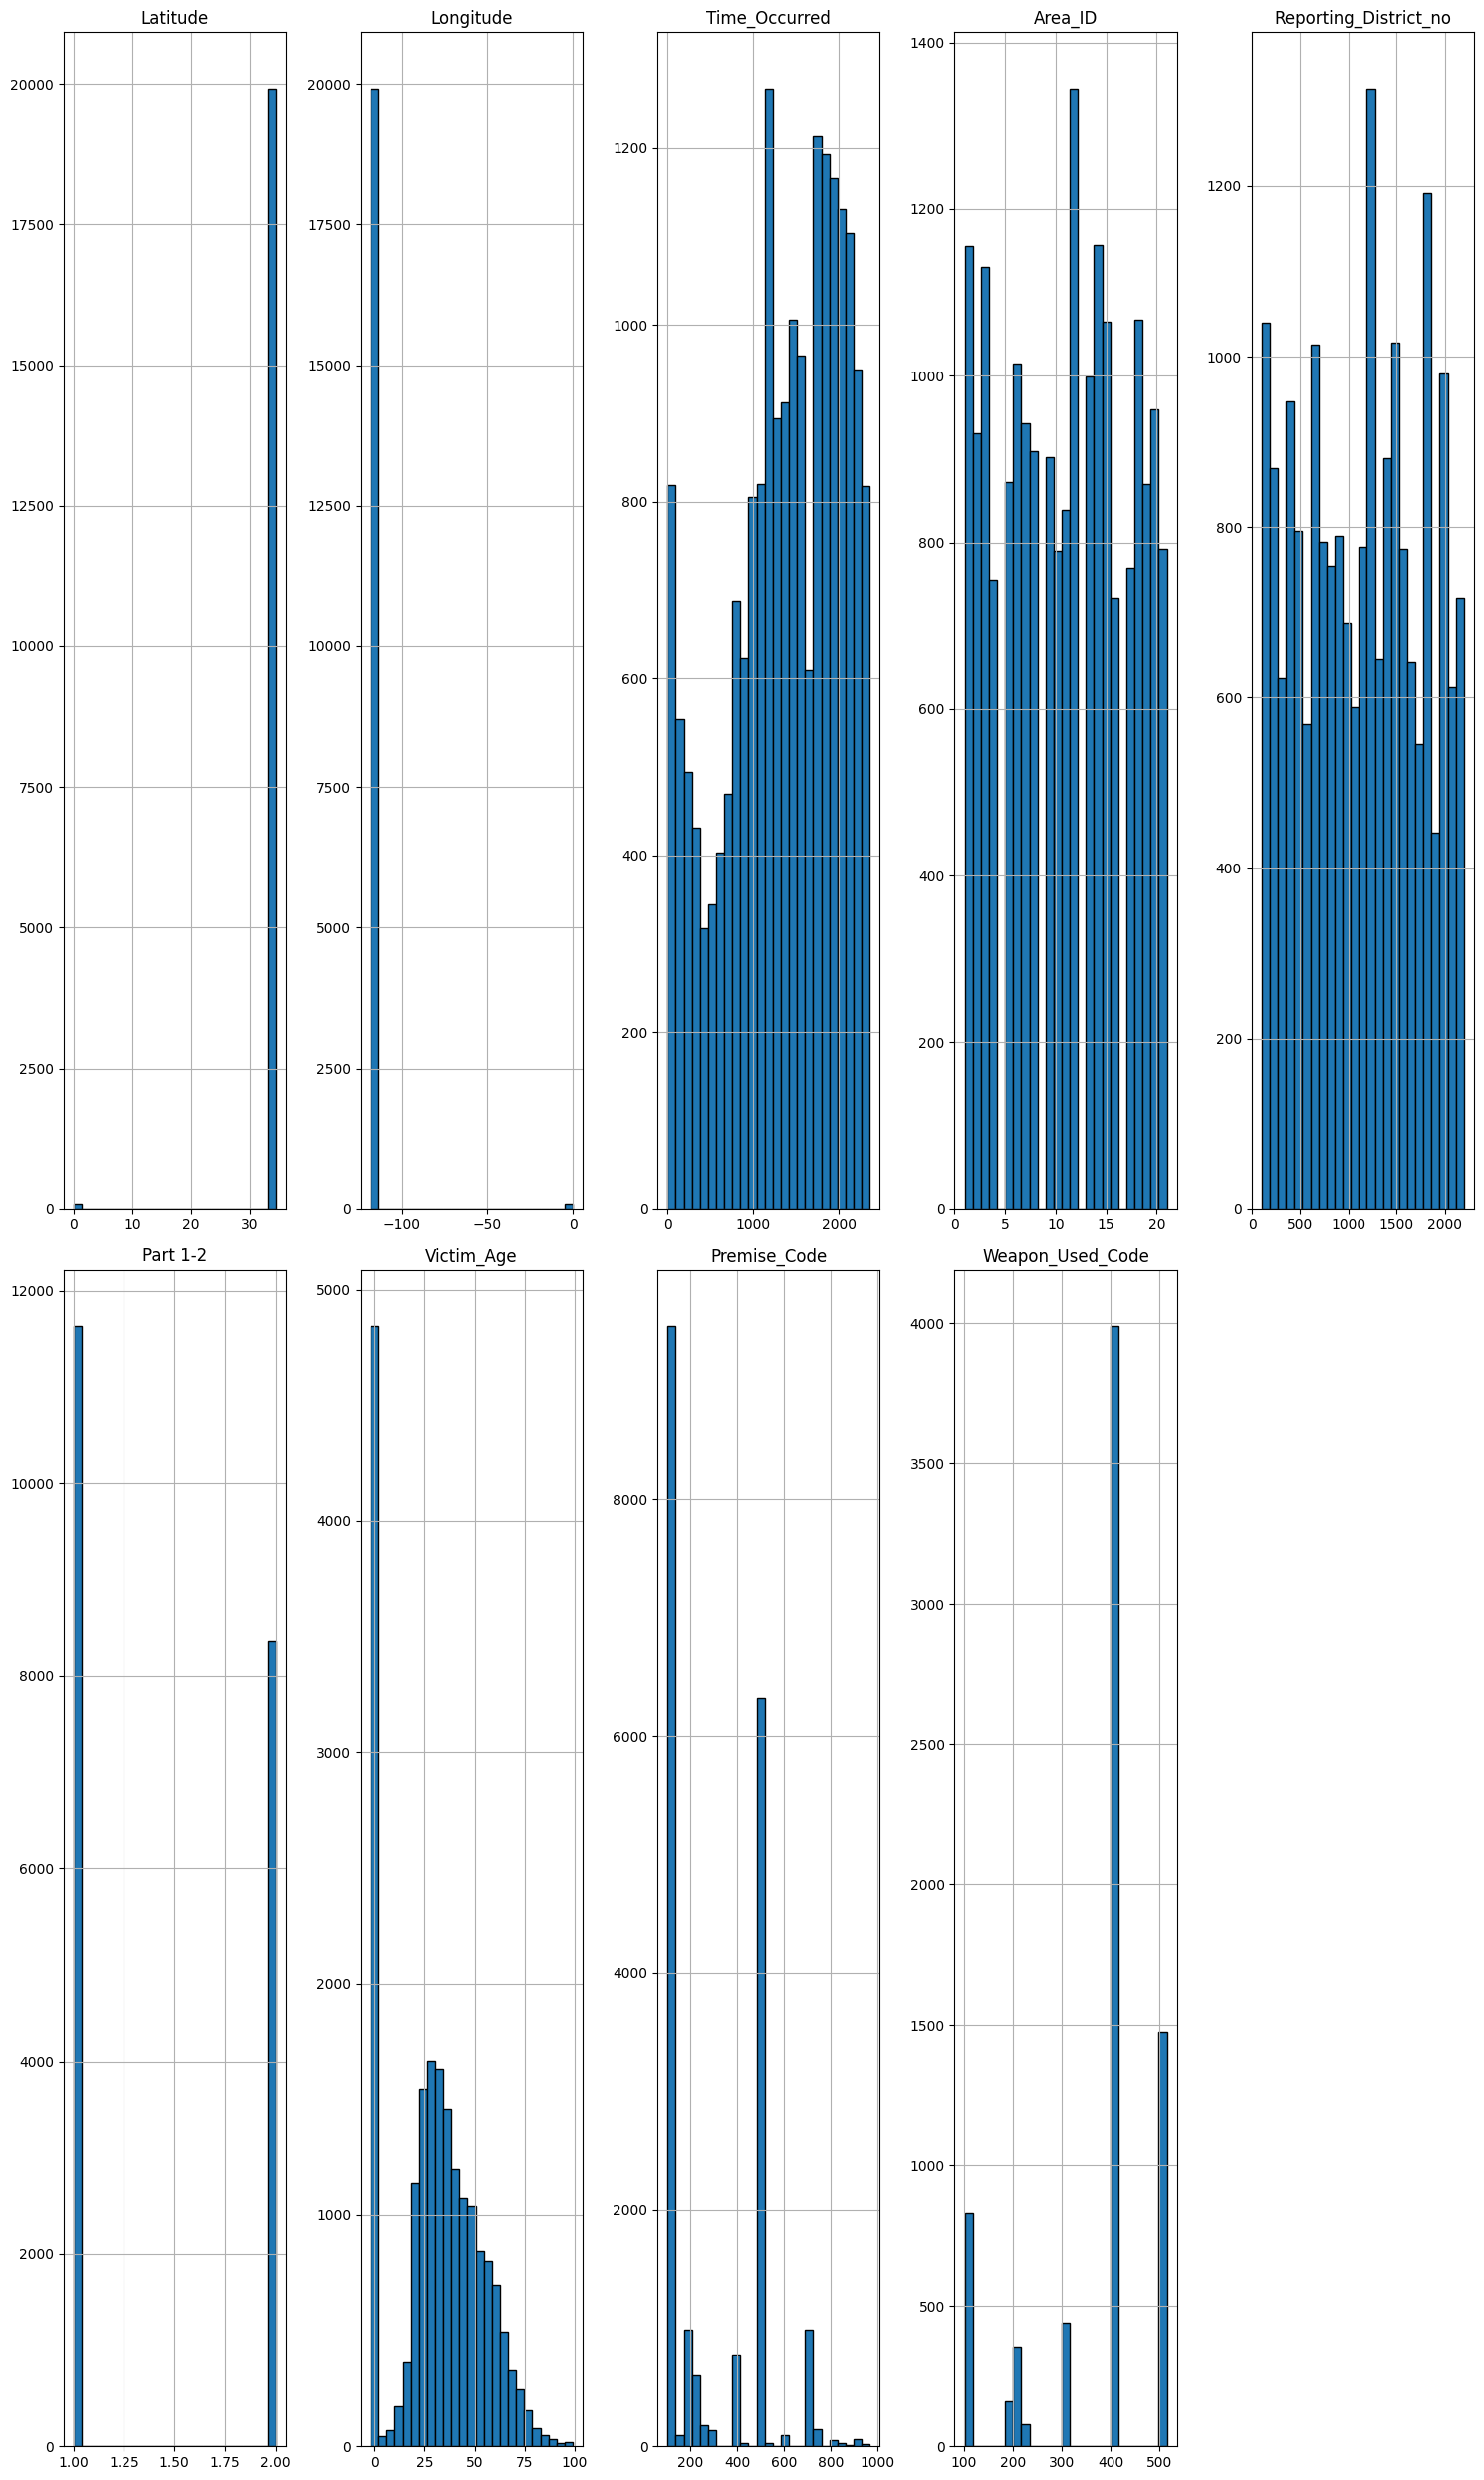

In [147]:
# Plots the histogram for each numerical feature in a separate subplot
X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Status_Description     0.76180
Status                 0.76180
Part 1-2               0.58185
Victim_Sex             0.42690
Victim_Descent         0.30715
Premise_Description    0.25165
Premise_Code           0.25165
Victim_Age             0.24140
Weapon_Description     0.19950
Weapon_Used_Code       0.19950
dtype: float64

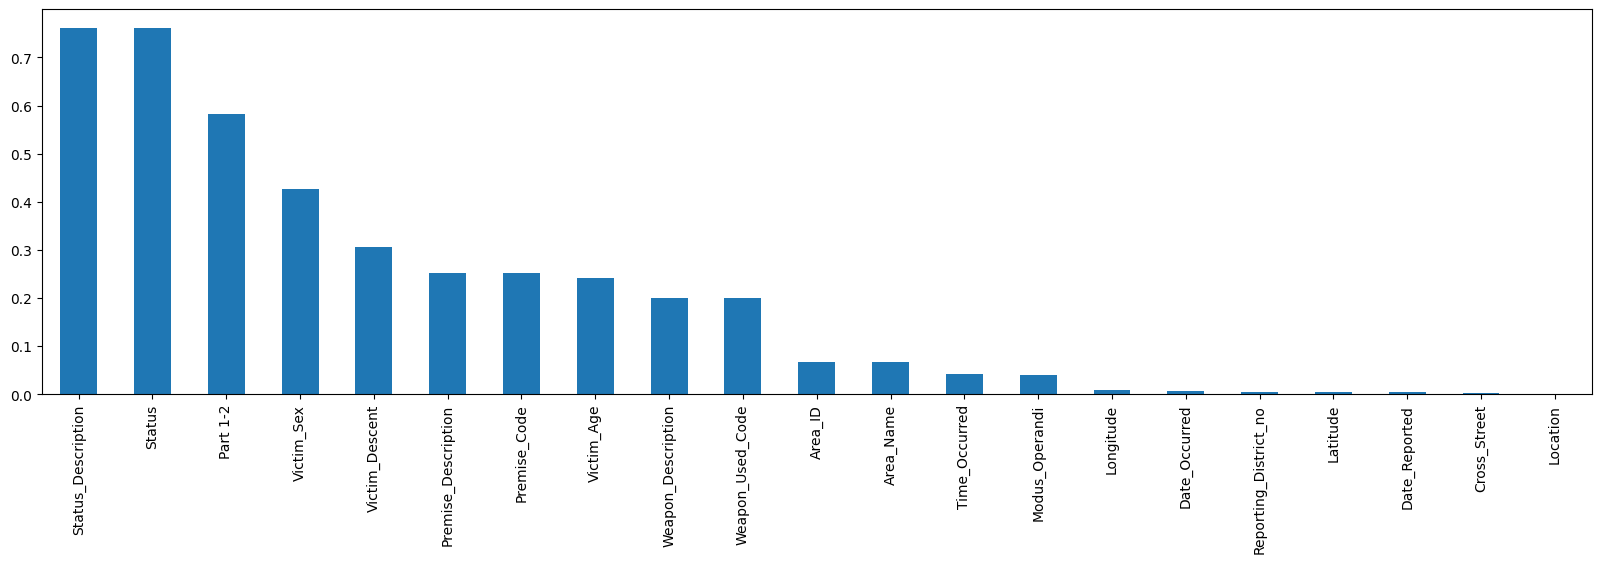

In [152]:
# Collects for each feature the most frequent entry
most_frequent_occurance = X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = X.eq(most_frequent_occurance.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 10 top features with the highest ratio of singular value content
display(df_freq.head(n=10))

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(20, 5));

In [188]:
# Using sklearn variancethreshold to find constant features.
# In all feature selection procedures, it is recommended to select the features by reviewing only the training set. The GOAL is to hopefully avoid overfitting.
# Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. 
# By default, it removes all features that have the same value in all samples.

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_numerical)  # fit finds the features with zero variance

# print the constant features
print(
    len([
        x for x in X_numerical.columns
        if x not in X_numerical.columns[sel.get_support()]
    ]))

[x for x in X_numerical.columns if x not in X_numerical.columns[sel.get_support()]]

0


[]

In [189]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_numerical)  # fit finds the features with low variance

# finally we can print the quasi-constant features
print(
    len([
        x for x in X_numerical.columns
        if x not in X_numerical.columns[sel.get_support()]
    ]))

[x for x in X_numerical.columns if x not in X_numerical.columns[sel.get_support()]]

0


[]

In [191]:
missing_data = pd.DataFrame({'total_missing': X.isnull().sum(), 'perc_missing': (X.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Location,0,0.000000
Cross_Street,16552,19.992753
Latitude,0,0.000000
Longitude,0,0.000000
Date_Reported,0,0.000000
Date_Occurred,0,0.000000
Time_Occurred,0,0.000000
Area_ID,0,0.000000
Area_Name,0,0.000000
Reporting_District_no,0,0.000000


In [192]:
# Milestone1:
# Were there any null values present? **** YES ****
# EDA(Exploratory Data Analysis)
X.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
dtype: int64

<Figure size 1200x1000 with 0 Axes>

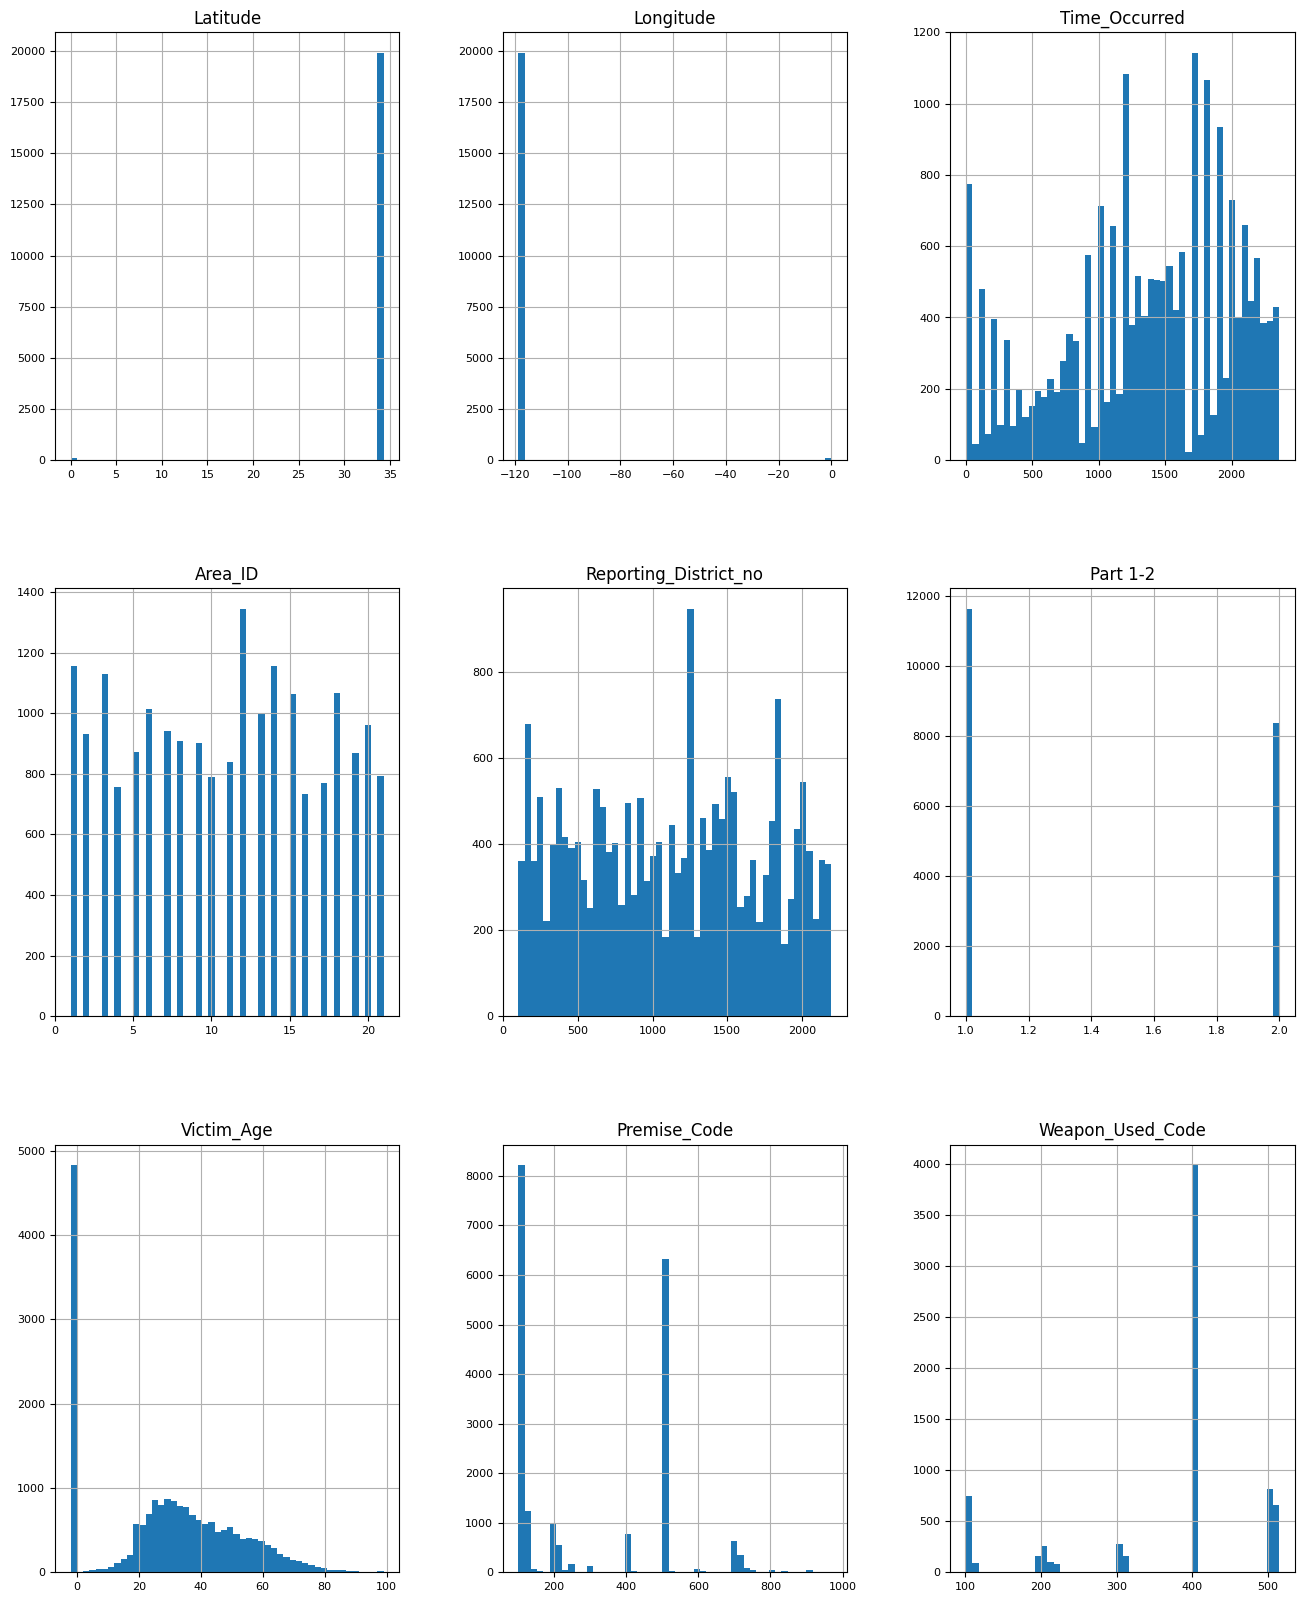

In [237]:
# Milestone1: Details of Distribution Numerical data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
X_num = X.select_dtypes(include = ['float64', 'int64'])
X_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [19]:
# Milestone1:
# Were you able to split the dataset in training and validation sets with train_test_split?  **** YES ****
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [18]:
# Milestone1:
# Were you able to convert all the text data to numerical data?  **** YES ****
# Define numeric and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

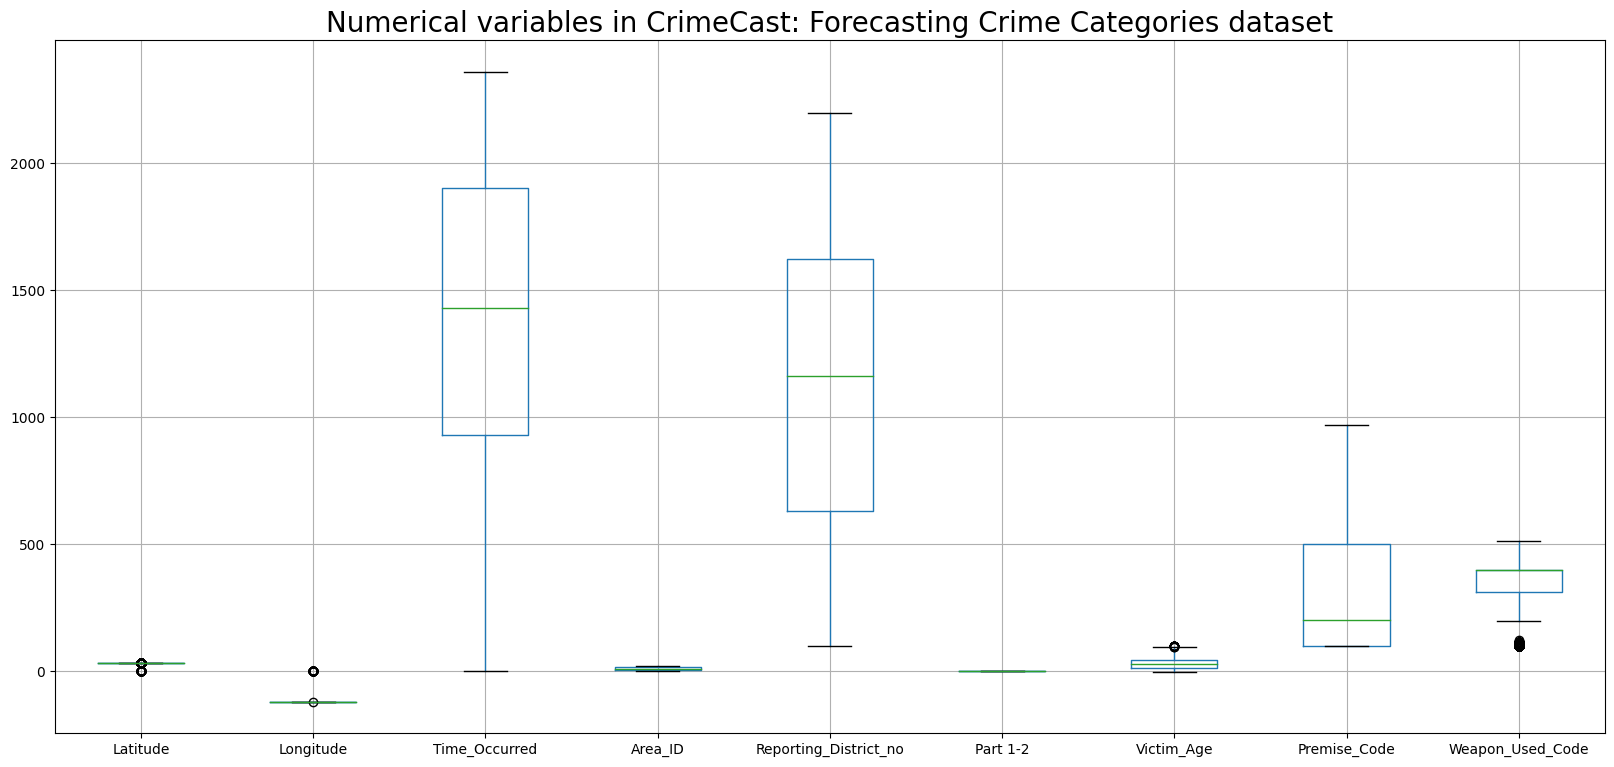

In [21]:
# Milestone1:
import matplotlib.pyplot as plt  
plt.figure(figsize=(20,9))
X[numerical_features].boxplot()
plt.title("Numerical variables in CrimeCast: Forecasting Crime Categories dataset", fontsize=20)
plt.show()

In [24]:
# Milestone1:
# Did you applied any data scaling technique? **** YES ****
# Define separate preprocessing steps for numeric features
# Did you applied any data scaling technique? **** YES ****, Applied the StandardScaler Technique
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [25]:
# Milestone1:
# Define separate preprocessing steps for numeric and categorical features
# Were you able to convert all the text data to numerical data?

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [26]:
# Milestone1:
# Define separate preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [27]:
# Milestone1:
# Define the pipeline including preprocessing and the DecisionTreeClassifier model. Building a Model Without Cross-Validation
# Were you able to make the baseline model ? **** YES ****
DT_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [28]:
# Milestone1:
# Train the model using DecisionTree Classification Algorithm of SKlearm.
DT_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [214]:
missing_data = pd.DataFrame({'total_missing': X.isnull().sum(), 'perc_missing': (X.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Location,0,0.000000
Cross_Street,16552,19.992753
Latitude,0,0.000000
Longitude,0,0.000000
Date_Reported,0,0.000000
Date_Occurred,0,0.000000
Time_Occurred,0,0.000000
Area_ID,0,0.000000
Area_Name,0,0.000000
Reporting_District_no,0,0.000000


In [215]:
missing_data = pd.DataFrame({'total_missing': X_train.isnull().sum(), 'perc_missing': (X_train.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Location,0,0.000000
Cross_Street,13259,16.015219
Latitude,0,0.000000
Longitude,0,0.000000
Date_Reported,0,0.000000
Date_Occurred,0,0.000000
Time_Occurred,0,0.000000
Area_ID,0,0.000000
Area_Name,0,0.000000
Reporting_District_no,0,0.000000


In [216]:
missing_data = pd.DataFrame({'total_missing': X_test.isnull().sum(), 'perc_missing': (X_test.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Location,0,0.000000
Cross_Street,3293,3.977534
Latitude,0,0.000000
Longitude,0,0.000000
Date_Reported,0,0.000000
Date_Occurred,0,0.000000
Time_Occurred,0,0.000000
Area_ID,0,0.000000
Area_Name,0,0.000000
Reporting_District_no,0,0.000000


In [74]:
# Milestone1:
# Evaluate the model
Accuracy_On_Train_Data1 = DT_model.score(X_train, y_train)
Accuracy_On_Test_Data1 = DT_model.score(X_test, y_test)

print(f"Accuracy_On_Train_Data1: {Accuracy_On_Train_Data1:.4f}")
print(f"Accuracy_On_Test_Data1: {Accuracy_On_Test_Data1:.4f}")

Accuracy_On_Train_Data1: 1.0000
Accuracy_On_Test_Data1: 0.8590


In [77]:
# Milestone1:
# Make predictions on the Test Data
# How much score did you get from the baseline model? **** 0.8590 ****
Predictions_On_Test_Data1 = DT_model.predict(Test_data_df)
Predictions_On_Test_Data1

array(['Violent Crimes', 'Property Crimes', 'Crimes against Public Order',
       ..., 'Violent Crimes', 'Violent Crimes', 'Property Crimes'],
      dtype=object)

In [79]:
# Milestone2:
# Define the pipeline including preprocessing and the LogisticRegression Classifier model. Building a Model Without Cross-Validation
LR_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42,max_iter=1000))
])

LR_model.fit(X_train, y_train)
Accuracy_On_Train_Data2 = LR_model.score(X_train, y_train)
Accuracy_On_Test_Data2 = LR_model.score(X_test, y_test)
Predictions_On_Test_Data2 = LR_model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data2: {Accuracy_On_Train_Data2:.4f}")
print(f"Accuracy_On_Test_Data2: {Accuracy_On_Test_Data2:.4f}")
Predictions_On_Test_Data2

Accuracy_On_Train_Data2: 0.9858
Accuracy_On_Test_Data2: 0.8738


array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [29]:
# Milestone2-1:
# Were you able to train any model with cross validation? **** YES ****
 # How many folds you made to train the model with cross validation? **** CV=5 ****
from sklearn.linear_model import LogisticRegressionCV
LR_CV_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv=5, random_state=42,max_iter=1000))
])

LR_CV_model.fit(X_train, y_train)
Accuracy_On_Train_Data21 = LR_CV_model.score(X_train, y_train)
Accuracy_On_Test_Data21 = LR_CV_model.score(X_test, y_test)
Predictions_On_Test_Data21 = LR_CV_model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data: {Accuracy_On_Train_Data21:.4f}")
print(f"Accuracy_On_Test_Data: {Accuracy_On_Test_Data21:.4f}")
Predictions_On_Test_Data21

Accuracy_On_Train_Data: 0.9497
Accuracy_On_Test_Data: 0.8764


array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

# Comparing the THREE(1, 2, 2-1 above) models trained up to this point
# DecisionTreeClassifier: internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome
# LogisticRegression Classifier a predictive analysis that estimates/models the probability of event occurring based on a given dataset. The underlying algorithmic mechanism is approximately same as Linear Regression
# LogisticRegressionCV Classifier: There is a built in cross validation argument in the algorithm. With CV=5 being used here.

# The Accuracy on the Test Data is 0.85140, 0.86640 and 0.86720 respectively for DecisionTreeClassifier, LogisticRegression and LogisticRegressionCV respectively

In [ ]:
# Milestone3-1: Build K-Nearest Neighbors (KNN)Classifier Model with Hyperparameter Tuning using GridSearchCV
# parameters={ 'n_neighbors' : [5,7,9,11,13,15],'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}
# Were you able to tune the hyperparameters? **** YES ****
# Were you able to train your model with the KNN algorithm ?  **** YES ****
parameters={ 'n_neighbors' : [11],'weights' : ['distance'],'metric' : ['manhattan']}

KNN_Model_Tuning_GS=GridSearchCV(KNeighborsClassifier(), parameters, verbose = 1, cv=3, n_jobs = -1)

KNN_CV_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", KNN_Model_Tuning_GS)])

KNN_CV_Tuning.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['minkowski', 'euclidean',
                                                     'manhattan'],
                                          'n_neighbors': [5, 7, 9, 11, 13, 15],
                                          'weights': ['uniform', 'distance']},
                              verbose=1))])

In [ ]:
# Milestone3-1:
# Printing the best score obtained during GridSearchCV
KNN_Model_Tuning_GS.best_score_

0.839249842503983

In [ ]:
# Milestone3-1:
# After Hyperparameter tuning the KNN model, what was the value of n_neighbors you got?  **** 'n_neighbors': 11  ****
KNN_Model_Tuning_GS.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
KNN_Model_Tuning_GS.best_estimator_

In [40]:
# Milestone3-1:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'))
])

KNN_model.fit(X_train, y_train)
Accuracy_On_Train_Data31 = KNN_model.score(X_train, y_train)
Accuracy_On_Test_Data31 = KNN_model.score(X_test, y_test)
Predictions_On_Test_Data31 = KNN_model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data: {Accuracy_On_Train_Data31:.4f}")
print(f"Accuracy_On_Test_Data: {Accuracy_On_Test_Data31:.4f}")
Predictions_On_Test_Data31

Accuracy_On_Train_Data: 1.0000
Accuracy_On_Test_Data: 0.8407


array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [ ]:
# Milestone3-1:
# Printingthe Predictions on the Test Data
print("Revised Predictions\n")
Predictions_On_Test_Data31

Revised Predictions




array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [ ]:
# Milestone3-2: Build SVM Algorithm Classifier Model with Hyperparameter Tuning using GridSearchCV
# Were you able to train your model with the SVM algorithm ?   **** YES ****
from sklearn import svm
parameters={ 'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','linear'] }
#parameters={ 'C': [0.1],'gamma': [1],'kernel': ['linear'] }

SVM_Model_Tuning_GS=GridSearchCV(svm.SVC(), parameters)
SVM_CV_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", SVM_Model_Tuning_GS)])
SVM_CV_Tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1], 'gamma': [1],
                                          'kernel': ['linear']}))])

In [ ]:
# Milestone3-2:
# Printing the best score obtained during GridSearchCV
SVM_Model_Tuning_GS.best_score_

0.868625

In [ ]:
# Milestone3-2:
# Printing the best DecisionTree parameters to fit the model
SVM_Model_Tuning_GS.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
# Milestone3-2:
# Printing the DecisionTree best estimator details
SVM_Model_Tuning_GS.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [41]:
# Milestone3-2:
# Applying the Optimal Parameters obtained through GridSearchCV and Fitting the model with preprocessor
from sklearn import svm

SVM_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(C=0.1, gamma=1, kernel='linear'))
])

SVM_model.fit(X_train, y_train)
Accuracy_On_Train_Data32 = SVM_model.score(X_train, y_train)
Accuracy_On_Test_Data32 = SVM_model.score(X_test, y_test)
Predictions_On_Test_Data32 = SVM_model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data32: {Accuracy_On_Train_Data32:.4f}")
print(f"Accuracy_On_Test_Data32: {Accuracy_On_Test_Data32:.4f}")
Predictions_On_Test_Data32

Accuracy_On_Train_Data32: 0.9085
Accuracy_On_Test_Data32: 0.8738


array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [ ]:
# Milestone4-1: Build DecisionTree Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# parameters={ 'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"] }
# Were you able to train your model with a Decision Tree  algorithm?   **** YES ****
parameters={ 'max_depth': [10],'min_samples_leaf': [5],'criterion': ["entropy"] }

DT_Model_Tuning_GS=GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
DT_CV_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", DT_Model_Tuning_GS)])
DT_CV_Tuning.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=4,
                              estimator=DecisionTreeClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [2, 3, 5, 10, 20],
                                          'min_samples_leaf': [5, 10, 20, 50,
                                                               100]},
                              scoring='accuracy', verbose=1))])

In [ ]:
# Milestone4-1: Build DecisionTree Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Printing the best score obtained during GridSearchCV
DT_Model_Tuning_GS.best_score_

0.8608125

In [ ]:
# Milestone4-1: Build DecisionTree Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Printing the best DecisionTree parameters to fit the model
DT_Model_Tuning_GS.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

In [ ]:
# Milestone4-1: Build DecisionTree Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Printing the DecisionTree best estimator details
DT_Model_Tuning_GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

In [42]:
# Milestone4-1: Build DecisionTree Classification Algorithm with Optimal Parameters obtained through Hyperparameter Tuning using GridSearchCV
# Applying the Optimal Parameters obtained through GridSearchCV and Fitting the model with preprocessor
DT_model_Tuning = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='entropy'))
])

DT_model_Tuning.fit(X_train, y_train)
Accuracy_On_Train_Data41 = DT_model_Tuning.score(X_train, y_train)
Accuracy_On_Test_Data41 = DT_model_Tuning.score(X_test, y_test)
Predictions_On_Test_Data41 = DT_model_Tuning.predict(Test_data_df)

print(f"Accuracy_On_Train_Data41: {Accuracy_On_Train_Data41:.4f}")
print(f"Accuracy_On_Test_Data41: {Accuracy_On_Test_Data41:.4f}")
Predictions_On_Test_Data41

Accuracy_On_Train_Data41: 0.8858
Accuracy_On_Test_Data41: 0.8652


array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [ ]:
# Milestone4-2: Build Bagging Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Were you able to train your model with a Bagging algorithm ?     **** YES ****
'''
parameters = {
    'n_estimators': [300, 400, 500, 600, 700, 800],
    'max_features': [0.90, 0.92, 0.95, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'warm_start': [True, False],
    'oob_score': [True, False],
    'max_samples': [x / 10 for x in range(1, 11)]
}
'''
parameters = {
    'n_estimators': [140],
    'max_features': [0.92],
    'bootstrap': [False],
    'bootstrap_features': [True],
    'warm_start': [False],
    'oob_score': [False],
    'max_samples': [1.0]
}
BC_Model_Tunning_GS = GridSearchCV(BaggingClassifier(verbose=1,
                           random_state=42,
                           n_jobs=-1), parameters, cv=5, verbose=1, n_jobs=-1)
BC_Model_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", BC_Model_Tunning_GS)])
BC_Model_Tuning.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  5.0min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=BaggingClassifier(n_jobs=-1,
                                                          random_state=42,
                                                          verbose=1),
                              n_jobs=-1,
                              param_grid={'bootstrap': [False],
                                          'bootstrap_features': [True],
                                          'max_features': [0.92],
                                          'max_samples': [1.0],
                                          'n_estimators': [140],
                                          'oob_score': [False],
                                          'warm_start': [False]},
                              verbose=1))])

In [ ]:
# Milestone4-2:
# Printing the best score obtained during GridSearchCV
BC_Model_Tunning_GS.best_score_

0.8720625

In [ ]:
# Milestone4-2: Build DecisionTree Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Printing the best Bagginng Algorithm parameters to fit the model
BC_Model_Tunning_GS.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 0.92,
 'max_samples': 1.0,
 'n_estimators': 140,
 'oob_score': False,
 'warm_start': False}

In [ ]:
# Milestone4-2:
# Printing the Bagging Algorithm best estimator details
BC_Model_Tunning_GS.best_estimator_

BaggingClassifier(bootstrap=False, bootstrap_features=True, max_features=0.92,
                  n_estimators=140, n_jobs=-1, random_state=42, verbose=1)

In [43]:
# Milestone4-2:
BC_Model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  max_features=0.92, max_samples=1.0, n_estimators=140,
                  n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                  warm_start=False))
])

BC_Model.fit(X_train, y_train)
Accuracy_On_Train_Data42 = BC_Model.score(X_train, y_train)
Accuracy_On_Test_Data42 = BC_Model.score(X_test, y_test)
Predictions_On_Test_Data42 = BC_Model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data42: {Accuracy_On_Train_Data42:.4f}")
print(f"Accuracy_On_Test_Data42: {Accuracy_On_Test_Data42:.4f}")
Predictions_On_Test_Data42

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy_On_Train_Data42: 1.0000
Accuracy_On_Test_Data42: 0.8750


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.8s finished


array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Violent Crimes', 'Violent Crimes', 'Property Crimes'],
      dtype=object)

In [ ]:
# Milestone4-3: Build Boosting Classification Algorithm with Hyperparameter Tuning using GridSearchCV
# Were you able to train your model with a Boosting algorithm ?   ****  YES ****


parameters = {
    'n_estimators':range(10,100,140),
    'max_depth':[1,5,6,9], 'min_samples_split':range(400,800,100,900),
    'warm_start': [True, False],
    'max_features':range(7,20,2),
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]]
}
'''
parameters = {
    'n_estimators':range(10, 100, 140),
    'max_depth':[6], 'min_samples_split':[900],
    'warm_start': [True, False],
    'max_features':[9],
    'subsample':[0.8]
}
'''

BoostingC_Model_Tunning_GS = GridSearchCV(GradientBoostingClassifier(verbose=1,random_state=42), parameters, cv=5, verbose=1, n_jobs=-1)
BoostingC_Model_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", BoostingC_Model_Tunning_GS)])
BoostingC_Model_Tuning.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits

      Iter       Train Loss      OOB Improve   Remaining Time 

         1           1.1384           0.0045            0.69s

         2           1.1401           0.0002            0.58s

         3           1.1443           0.0001            0.52s

         4           1.1395           0.0011            0.43s

         5           1.1349           0.0024            0.36s

         6           1.1301           0.0027            0.28s

         7           1.1312          -0.0000            0.21s

         8           1.1294          -0.0000            0.14s

         9           1.1283           0.0005            0.07s

        10           1.1206           0.0002            0.00s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingClassifier(random_state=42,
                                                                   verbose=1),
                              n_jobs=-1,
                              param_grid={'max_depth': [6], 'max_features': [9],
                                          'min_samples_split': [900],
                                          'n_estimators': range(10, 100, 140),
                                          'subsample': [0.8],
                                          'warm_start': [True, False]},
                              verbose=1))])

In [ ]:
# Milestone4-3:
# Printing the best score obtained during GridSearchCV
BoostingC_Model_Tunning_GS.best_score_

0.5851875

In [ ]:
# Milestone4-3: Build Boosting Algorithm Algorithm with Hyperparameter Tuning using GridSearchCV
# Printing the best Boosting Algorithm parameters to fit the model
BoostingC_Model_Tunning_GS.best_params_

{'max_depth': 6,
 'max_features': 9,
 'min_samples_split': 900,
 'n_estimators': 10,
 'subsample': 0.8,
 'warm_start': True}

In [ ]:
# Milestone4-3:
# The GradientBoostingClassifier with Optimal Parameters and Estimator.
# min_samples_split: 900
# min_samples_leaf: 60
# max_depth: 6
# max_features: 9
BoostingC_Model_Tunning_GS.best_estimator_

GradientBoostingClassifier(max_depth=6, max_features=9, min_samples_split=900,
                           n_estimators=10, random_state=42, subsample=0.8,
                           verbose=1, warm_start=True)

In [44]:
# Milestone4-3:
# Train The GradientBoostingClassifier with Optimal Parameter Combination.
BoostingC_Model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(max_depth=6, max_features=9,
                           min_samples_split=900, n_estimators=10,
                           random_state=42, subsample=0.8, warm_start=True))
])

BoostingC_Model.fit(X_train, y_train)
Accuracy_On_Train_Data43 = BoostingC_Model.score(X_train, y_train)
Accuracy_On_Test_Data43 = BoostingC_Model.score(X_test, y_test)
Predictions_On_Test_Data43 = BoostingC_Model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data43: {Accuracy_On_Train_Data43:.4f}")
print(f"Accuracy_On_Test_Data43: {Accuracy_On_Test_Data43:.4f}")
Predictions_On_Test_Data43

Accuracy_On_Train_Data43: 0.5858
Accuracy_On_Test_Data43: 0.5757


array(['Property Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Property Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

In [39]:
# Milestone4-4: Build Multi-Layer Perceptron Classification Algorithm(MLPClassifier) with Hyperparameter Tuning using GridSearchCV
# Setup the exaustive list of parameters to pass the GridSearchCV along with the object of MLPClassifier to arrive at the Optimial Parameters that
# can be used to train the model and predict the accuracy on test data.
# Were you able to train your model with the Multi Layer Perceptron algorithm ?   **** YES ****

'''
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
              'alpha': 10.0 ** -np.arange(1, 10),
              'random_state':[0,1,2,3,4,5,6,7,8,9],
              'hidden_layer_sizes': [20],
              'activation': ['tanh', 'relu'], 'learning_rate': ['constant','adaptive']
            }
'''

parameters = {'solver': ['adam'], 'max_iter': [1000],
              'alpha': [0.0001],
              'random_state':[42],
              'hidden_layer_sizes': [20],
              'activation': ['relu'], 'learning_rate': ['constant']
            }

MLPClassifier_Model_Tunning_GS = GridSearchCV(MLPClassifier(random_state=42,max_iter=1000), parameters, n_jobs=-1, cv=5)
MLPClassifier_Model_Tuning = Pipeline(steps=[('preprocessor', preprocessor),("model", MLPClassifier_Model_Tunning_GS)])
MLPClassifier_Model_Tuning.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fi...
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(max_iter=1000,
                                                      random_state=42),
                              n_jobs=-1,
                              param_grid={'activation': ['relu'],
                                          'alpha': [0.0001],
                                          'hidden_layer_sizes': [20],
                                          'learning_rate': ['constant'],
                                          'max_iter': [1000],
                                          'random_state': [42],
                                          'solver': ['adam']}))])

In [44]:
# Milestone4-4:
# Printing the best score obtained during GridSearchCV
MLPClassifier_Model_Tunning_GS.best_score_

0.8631249999999999

In [41]:
# Milestone4-4: Build Multi-Layer Perceptron algorithm MLPClassifier with Hyperparameter Tuning using GridSearchCV
# Printing the best Multi-Layer Perceptron algorithm MLPClassifier parameters to fit the model
MLPClassifier_Model_Tunning_GS.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'max_iter': 1000,
 'random_state': 42,
 'solver': 'adam'}

In [42]:
# Milestone4-4:
# Train The Multi-Layer Perceptron algorithm MLPClassifier with Optimal Parameter Combination.
MLPClassifier_Model_Tunning_GS.best_estimator_

MLPClassifier(hidden_layer_sizes=20, max_iter=1000, random_state=42)

In [113]:
# Milestone4-4:
MLPClassifier_Model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=20,learning_rate='constant', max_iter=1000,
    random_state=42, solver='adam'))
                              ])

MLPClassifier_Model.fit(X_train, y_train)
Accuracy_On_Train_Data44 = MLPClassifier_Model.score(X_train, y_train)
Accuracy_On_Test_Data44 = MLPClassifier_Model.score(X_test, y_test)
Predictions_On_Test_Data44 = MLPClassifier_Model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data44: {Accuracy_On_Train_Data44:.4f}")
print(f"Accuracy_On_Test_Data44: {Accuracy_On_Test_Data44:.4f}")
Predictions_On_Test_Data44

Accuracy_On_Train_Data44: 1.0000
Accuracy_On_Test_Data44: 0.8670


array(['Violent Crimes', 'Property Crimes', 'Crimes against Public Order',
       ..., 'Violent Crimes', 'Violent Crimes', 'Property Crimes'],
      dtype='<U29')

In [45]:
# Milestone4-4:
# Train The Multi-Layer Perceptron algorithm MLPClassifier with Optimal Parameter Combination.
MLPClassifier_Model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=20,
                           solver='adam', random_state=42,learning_rate= 'constant'))
])

MLPClassifier_Model.fit(X_train, y_train)
Accuracy_On_Train_Data44 = MLPClassifier_Model.score(X_train, y_train)
Accuracy_On_Test_Data44 = MLPClassifier_Model.score(X_test, y_test)
Predictions_On_Test_Data44 = MLPClassifier_Model.predict(Test_data_df)

print(f"Accuracy_On_Train_Data44: {Accuracy_On_Train_Data44:.4f}")
print(f"Accuracy_On_Test_Data44: {Accuracy_On_Test_Data44:.4f}")
Predictions_On_Test_Data44

Accuracy_On_Train_Data44: 1.0000
Accuracy_On_Test_Data44: 0.8670


array(['Violent Crimes', 'Property Crimes', 'Crimes against Public Order',
       ..., 'Violent Crimes', 'Violent Crimes', 'Property Crimes'],
      dtype='<U29')

In [49]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
############################# Evaluate the performance of the Classifiers that were Implemented here START ###############################
# 1. DecisionTreeClassifier
# 2-1. LogisticRegression
# 2-2. LogisticRegressionCV
# 3-1. KNeighborsClassifier
# 3-2. svc.SVM
# 4-1. DecisionTreeClassifier with Optimal Parameters using GriSearchCV
# 4-2. BaggingClassifier with Optimal Parameters using GriSearchCV
# 4-3. GradientBoostingClassifier with Optimal Parameters using GriSearchCV
# 4-4. MLPClassifier with Optimal Parameters using GriSearchCV
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy Score of DecisionTreeClassifier: {Accuracy_On_Test_Data1:.4f}")
print(f"Accuracy Score of LogisticRegression Classifier: {Accuracy_On_Test_Data2:.4f}")
print(f"Accuracy Score of LogisticRegressionCV Classifier: {Accuracy_On_Test_Data21:.4f}")
print(f"Accuracy Score of KNeighborsClassifier Classifier: {Accuracy_On_Test_Data31:.4f}")
print(f"Accuracy Score of svm.SVC Classifier: {Accuracy_On_Test_Data32:.4f}")
print(f"Accuracy Score of DecisionTreeClassifier Classifier with Optimal Parameters: {Accuracy_On_Test_Data41:.4f}")
print(f"Accuracy Score of BaggingClassifier with Optimal Parameters: {Accuracy_On_Test_Data42:.4f}")
print(f"Accuracy Score of GradientBoostingClassifier with Optimal Parameters: {Accuracy_On_Test_Data43:.4f}")
print(f"Accuracy Score of MLPClassifier with Optimal Parameters: {Accuracy_On_Test_Data44:.4f}")
############################# Evaluate the performance of the Classifiers that were Implemented here END ###############################

Accuracy Score of DecisionTreeClassifier: 0.8590
Accuracy Score of LogisticRegression Classifier: 0.8738
Accuracy Score of LogisticRegressionCV Classifier: 0.8750
Accuracy Score of KNeighborsClassifier Classifier: 0.8407
Accuracy Score of svm.SVC Classifier: 0.8738
Accuracy Score of DecisionTreeClassifier Classifier with Optimal Parameters: 0.8652
Accuracy Score of BaggingClassifier with Optimal Parameters: 0.8750
Accuracy Score of GradientBoostingClassifier with Optimal Parameters: 0.5757
Accuracy Score of MLPClassifier with Optimal Parameters: 0.8670


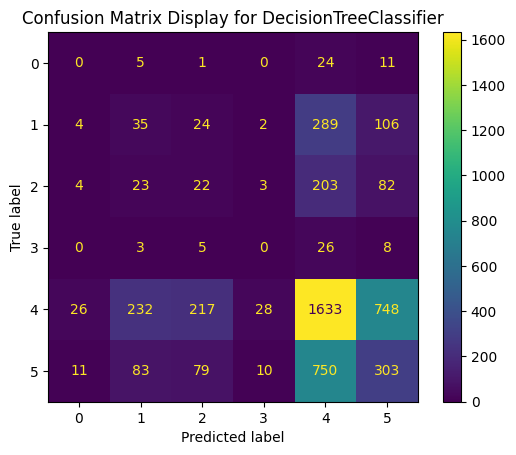

In [100]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data1)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for DecisionTreeClassifier")
plt.show()


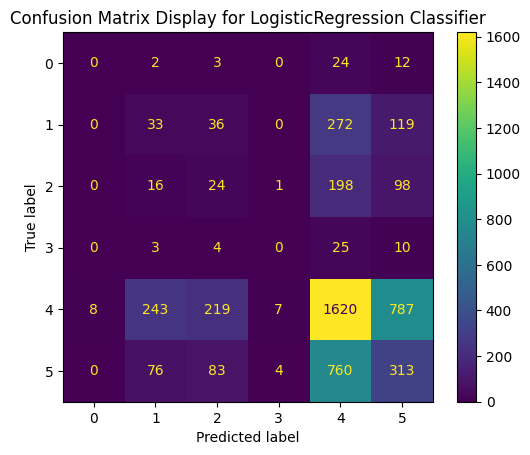

In [101]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data2)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for LogisticRegression Classifier")
plt.show()

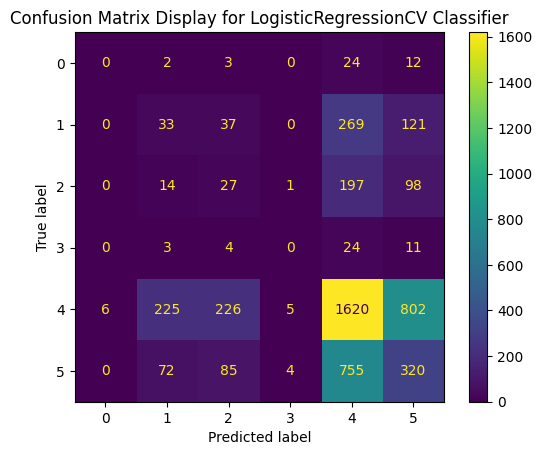

In [102]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data21)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for LogisticRegressionCV Classifier")
plt.show()

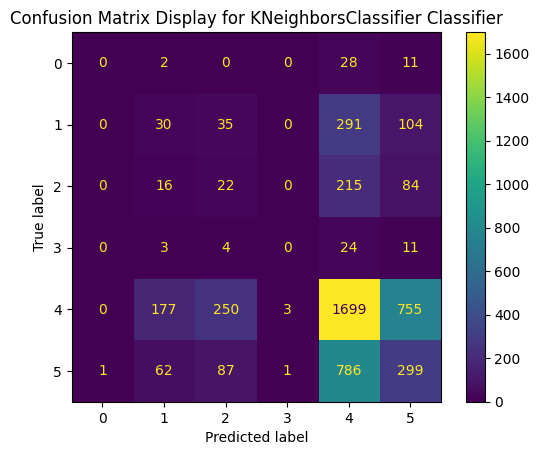

In [103]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data31)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for KNeighborsClassifier Classifier")
plt.show()

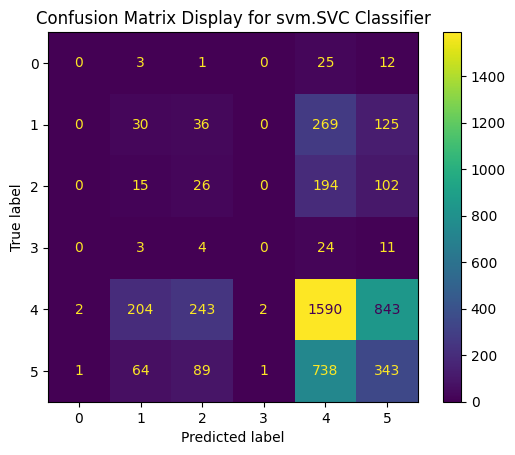

In [118]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data32)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for svm.SVC Classifier")
plt.show()

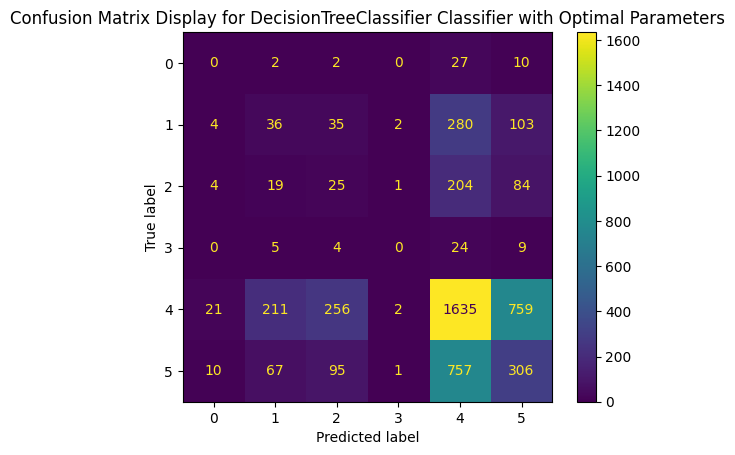

In [105]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrixcon_matrix = confusion_matrix(y_test,Predictions_On_Test_Data41)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for DecisionTreeClassifier Classifier with Optimal Parameters")
plt.show()

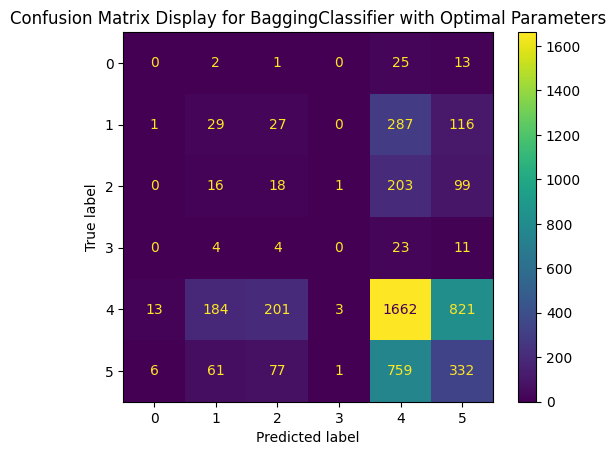

In [106]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data42)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for BaggingClassifier with Optimal Parameters")
plt.show()

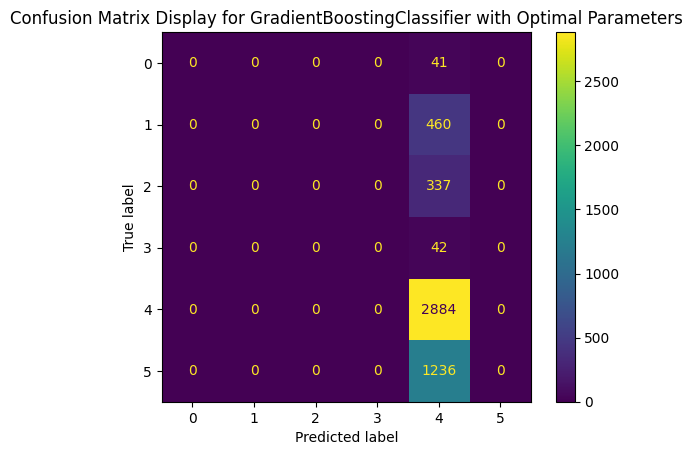

In [107]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data43)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for GradientBoostingClassifier with Optimal Parameters")
plt.show()


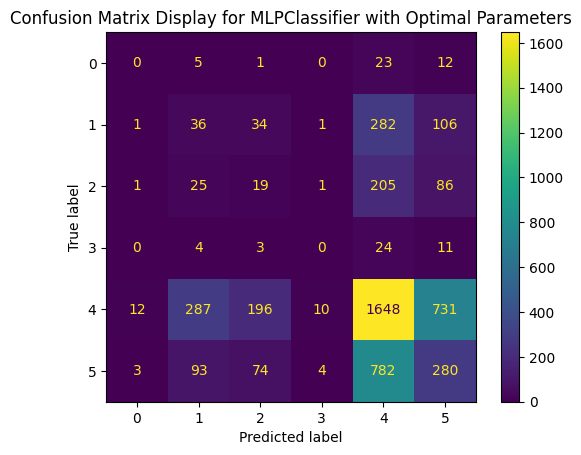

In [109]:
# Milestone5:
# Have you executed the ML end to end process more than once?  **** YES ****
# Display the Confusion Matrix
con_matrix = confusion_matrix(y_test,Predictions_On_Test_Data44)
con_display = ConfusionMatrixDisplay(con_matrix)
con_display.plot()
plt.title("Confusion Matrix Display for MLPClassifier with Optimal Parameters")
plt.show()


In [115]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for DecisionTreeClassifier")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data1, target_names=Crime_Category))

classification report for DecisionTreeClassifier
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.09      0.08      0.08       460
Fraud and White-Collar Crimes       0.06      0.07      0.06       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.57      0.56      2884
               Violent Crimes       0.24      0.25      0.24      1236

                     accuracy                           0.40      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.39      0.40      0.40      5000



In [116]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for LogisticRegression Classifier")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data2, target_names=Crime_Category))

classification report for LogisticRegression Classifier
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.09      0.07      0.08       460
Fraud and White-Collar Crimes       0.07      0.07      0.07       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.56      0.56      2884
               Violent Crimes       0.23      0.25      0.24      1236

                     accuracy                           0.40      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.39      0.40      0.40      5000



In [117]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for LogisticRegressionCV Classifier")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data21, target_names=Crime_Category))

classification report for LogisticRegressionCV Classifier
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.09      0.07      0.08       460
Fraud and White-Collar Crimes       0.07      0.08      0.08       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.56      0.56      2884
               Violent Crimes       0.23      0.26      0.25      1236

                     accuracy                           0.40      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.39      0.40      0.40      5000



In [ ]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for KNeighborsClassifier Classifier")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data31, target_names=Crime_Category))

In [124]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for svm.SVC Classifier")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data32, target_names=Crime_Category))

classification report for svm.SVC Classifier
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.09      0.07      0.08       460
Fraud and White-Collar Crimes       0.07      0.08      0.07       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.55      0.56      2884
               Violent Crimes       0.24      0.28      0.26      1236

                     accuracy                           0.40      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.40      0.40      0.40      5000



In [123]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for DecisionTreeClassifier with Optimal Parameters")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data41, target_names=Crime_Category))

classification report for DecisionTreeClassifier with Optimal Parameters
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.11      0.08      0.09       460
Fraud and White-Collar Crimes       0.06      0.07      0.07       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.57      0.56      2884
               Violent Crimes       0.24      0.25      0.24      1236

                     accuracy                           0.40      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.40      0.40      0.40      5000



In [122]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for BaggingClassifier with Optimal Parameters")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data42, target_names=Crime_Category))

classification report for BaggingClassifier with Optimal Parameters
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.10      0.06      0.08       460
Fraud and White-Collar Crimes       0.05      0.05      0.05       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.58      0.57      2884
               Violent Crimes       0.24      0.27      0.25      1236

                     accuracy                           0.41      5000
                    macro avg       0.16      0.16      0.16      5000
                 weighted avg       0.40      0.41      0.40      5000



In [125]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for GradientBoostingClassifier with Optimal Parameters")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data43, target_names=Crime_Category))

classification report for GradientBoostingClassifier with Optimal Parameters
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.00      0.00      0.00       460
Fraud and White-Collar Crimes       0.00      0.00      0.00       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.58      1.00      0.73      2884
               Violent Crimes       0.00      0.00      0.00      1236

                     accuracy                           0.58      5000
                    macro avg       0.10      0.17      0.12      5000
                 weighted avg       0.33      0.58      0.42      5000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# Milestone5:
# The classification report explains the summary of the quality of classification made by the trained model. It comprises mainly 5 columns and (N+3) rows. 
# The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for 
# accuracy, macro average and weighted average. 
from sklearn.metrics import classification_report
print("classification report for MLPClassifier with Optimal Parameters")
Crime_Category = ['Crimes against Persons', 'Crimes against Public Order', 'Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes']
print(classification_report(y_test, Predictions_On_Test_Data44, target_names=Crime_Category))

classification report for MLPClassifier with Optimal Parameters
                               precision    recall  f1-score   support

       Crimes against Persons       0.00      0.00      0.00        41
  Crimes against Public Order       0.08      0.08      0.08       460
Fraud and White-Collar Crimes       0.06      0.06      0.06       337
                 Other Crimes       0.00      0.00      0.00        42
              Property Crimes       0.56      0.57      0.56      2884
               Violent Crimes       0.23      0.23      0.23      1236

                     accuracy                           0.40      5000
                    macro avg       0.15      0.16      0.15      5000
                 weighted avg       0.39      0.40      0.39      5000



In [137]:
# Milestone5: Feature Engineering and Feature Selection using KSelectBest for LGBMClassifier Model Training
from lightgbm import LGBMClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif

models = {
    'LightGBM Classifier':LGBMClassifier(force_col_wise=True)   
}
score = {}
for k,v in models.items():
    model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif,k=21)),
    ('classifier', v)])
    model_pipeline.fit(X_train, y_train)
    score[k] = model_pipeline.score(X_test, y_test)
    print(f" -------- {k} done")
    print(score)

[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 21
[LightGBM] [Info] Start training from score -4.400870
[LightGBM] [Info] Start training from score -2.409428
[LightGBM] [Info] Start training from score -2.690210
[LightGBM] [Info] Start training from score -4.695825
[LightGBM] [Info] Start training from score -0.535346
[LightGBM] [Info] Start training from score -1.446469
 -------- LightGBM Classifier done
{'LightGBM Classifier': 0.8502}


In [140]:
# Milestone5: Feature Engineering and Feature Selection using TruncatedSVD for LGBMClassifier Model Training
from lightgbm import LGBMClassifier
from sklearn.decomposition import TruncatedSVD

models = {
    'LightGBM Classifier':LGBMClassifier(force_col_wise=True)   
}
score = {}
for k,v in models.items():
    model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ("feature_selection", TruncatedSVD(n_components=1000)),
    ('classifier', v)])
    model_pipeline.fit(X_train, y_train)
    score[k] = model_pipeline.score(X_test, y_test)
    print(f" -------- {k} done")
    print(score)

[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 1000
[LightGBM] [Info] Start training from score -4.400870
[LightGBM] [Info] Start training from score -2.409428
[LightGBM] [Info] Start training from score -2.690210
[LightGBM] [Info] Start training from score -4.695825
[LightGBM] [Info] Start training from score -0.535346
[LightGBM] [Info] Start training from score -1.446469
 -------- LightGBM Classifier done
{'LightGBM Classifier': 0.8758}


In [146]:
# Milestone5: Comparision of Classifiers with Cross Validation
from sklearn.svm import SVC
dtc_object = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dtc_scores = cross_val_score(dtc_object, X_train, y_train, cv=10)
print('DecisionTreeClassifier Score= %0.3f' % dtc_scores.mean())

svm_object = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
svm_scores = cross_val_score(svm_object, X_train, y_train, cv=10)
print('SVM Classifier Score= %0.3f' % svm_scores.mean())

DecisionTreeClassifier Score= 0.853
SVM Classifier Score= 0.868


In [32]:
# Create a DataFrame for the submission
import pandas as pd
submission = pd.DataFrame({
    'ID': range(1, len(Predictions_On_Test_Data21) + 1),  # Using index as ID
    'Crime_Category': Predictions_On_Test_Data21
})

In [34]:
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)